In [1]:
from ems.run import Driver

## Initialize Simulation

In [2]:
driver = Driver('examples/minimal.yaml')
sim, data = driver.create_simulator()

## Run Simulation

In [3]:
results = sim.run()

Current Time: 2019-01-31 00:16:12.100000
Processing new case: 1
Selected ambulance: 3
Started new event: Heading to Incident
Destination: 32.88048282231058, -117.23131554762371
Duration: 0:10:00
Distance Accuracy: None
Busy ambulances: ['3']
Ongoing cases: [1]
Pending cases: []

Metrics
Current Time: 2019-01-31 00:26:12.100000
Processing ongoing case: 1
Finished event: Heading to Incident
Started new event: Attending to Incident
Destination: 32.88048282231058, -117.23131554762371
Duration: 0:11:36
Distance Difference: None
Busy ambulances: ['3']
Ongoing cases: [1]
Pending cases: []

Metrics
Current Time: 2019-01-31 00:31:08.100000
Processing new case: 2
Selected ambulance: 1
Started new event: Heading to Incident
Destination: 32.88974041670751, -117.22584480556623
Duration: 0:17:37
Distance Accuracy: None
Busy ambulances: ['1', '3']
Ongoing cases: [1, 2]
Pending cases: []

Metrics
Current Time: 2019-01-31 00:37:48.100000
Processing ongoing case: 1
Finished event: Attending to Incident


Distance Difference: None
Busy ambulances: ['0', '1', '2', '3', '4', '5']
Ongoing cases: [30, 35, 31, 34, 32, 33]
Pending cases: []

Metrics
Current Time: 2019-01-31 07:57:01.100000
Processing ongoing case: 30
Finished event: Returning to Base
Case finished
Busy ambulances: ['0', '2', '3', '4', '5']
Ongoing cases: [35, 31, 34, 32, 33]
Pending cases: []

Metrics
Current Time: 2019-01-31 07:59:05.100000
Processing ongoing case: 35
Finished event: Heading to Incident
Started new event: Attending to Incident
Destination: 32.89111327318911, -117.22943420820894
Duration: 0:11:37
Distance Difference: None
Busy ambulances: ['0', '2', '3', '4', '5']
Ongoing cases: [31, 34, 32, 35, 33]
Pending cases: []

Metrics
Current Time: 2019-01-31 07:59:12.100000
Processing new case: 36
Selected ambulance: 1
Started new event: Heading to Incident
Destination: 32.88187177311769, -117.2344677326934
Duration: 0:15:58
Distance Accuracy: None
Busy ambulances: ['0', '1', '2', '3', '4', '5']
Ongoing cases: [31, 3

Duration: 0:17:06
Distance Difference: None
Busy ambulances: ['0', '1', '2', '3', '4', '5']
Ongoing cases: [64, 61, 65, 66, 63, 62]
Pending cases: []

Metrics
Current Time: 2019-01-31 14:27:43.100000
Processing ongoing case: 64
Finished event: Attending to Incident
Started new event: Heading to Hospital
Destination: 32.888216, -117.239697
Duration: 0:10:12
Distance Difference: None
Busy ambulances: ['0', '1', '2', '3', '4', '5']
Ongoing cases: [61, 65, 66, 64, 63, 62]
Pending cases: []

Metrics
Current Time: 2019-01-31 14:29:14.100000
Processing ongoing case: 61
Finished event: Returning to Base
Case finished
Busy ambulances: ['1', '2', '3', '4', '5']
Ongoing cases: [65, 66, 64, 63, 62]
Pending cases: []

Metrics
Current Time: 2019-01-31 14:29:18.100000
Processing ongoing case: 65
Finished event: Attending to Incident
Started new event: Heading to Hospital
Destination: 32.888216, -117.239697
Duration: 0:14:56
Distance Difference: None
Busy ambulances: ['1', '2', '3', '4', '5']
Ongoing 

Distance Difference: None
Busy ambulances: ['0', '1', '2', '3', '4', '5']
Ongoing cases: [96, 94, 97, 93, 95, 98]
Pending cases: []

Metrics
Current Time: 2019-01-31 21:22:21.100000
Processing ongoing case: 96
Finished event: Attending to Incident
Started new event: Heading to Hospital
Destination: 32.879802, -117.236564
Duration: 0:11:34
Distance Difference: None
Busy ambulances: ['0', '1', '2', '3', '4', '5']
Ongoing cases: [94, 97, 93, 96, 95, 98]
Pending cases: []

Metrics
Current Time: 2019-01-31 21:28:19.100000
Processing ongoing case: 94
Finished event: Returning to Base
Case finished
Busy ambulances: ['0', '2', '3', '4', '5']
Ongoing cases: [97, 93, 96, 95, 98]
Pending cases: []

Metrics
Current Time: 2019-01-31 21:28:40.100000
Processing ongoing case: 97
Finished event: Attending to Incident
Started new event: Heading to Hospital
Destination: 32.888216, -117.239697
Duration: 0:18:08
Distance Difference: None
Busy ambulances: ['0', '2', '3', '4', '5']
Ongoing cases: [93, 96, 95

## Graph Some Results

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

records = results.case_records

In [101]:
print("Number of Cases: {}".format(len(records)))

Number of Cases: 100


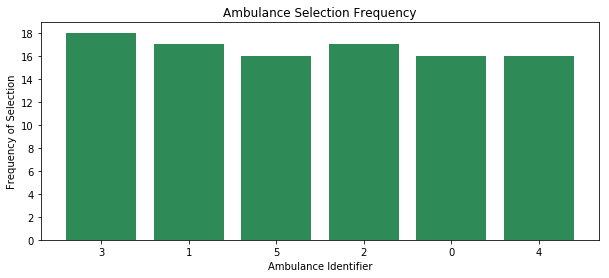

In [30]:
selected_ambulances = [record.ambulance.id for record in records]
groupings = defaultdict(lambda: 0)
for identifier in selected_ambulances:
    groupings[identifier] += 1

fig, ax = plt.subplots(figsize=(10, 4))
ax.yaxis.set_ticks(np.arange(0, 24, 2))
plt.bar(groupings.keys(), groupings.values(), color="seagreen")
plt.xlabel('Ambulance Identifier')
plt.ylabel('Frequency of Selection')
plt.title('Ambulance Selection Frequency')
plt.show()

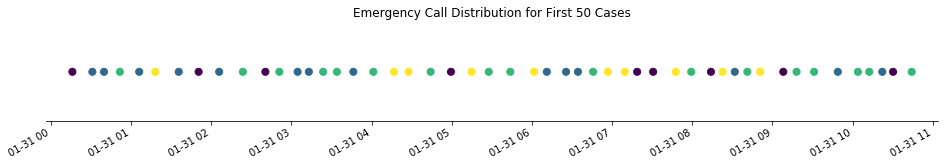

In [73]:
from datetime import timedelta

# First 50 cases
case_dates = [record.case.date_recorded for record in records[:50]]
case_priorities = [record.case.priority for record in records[:50]]

fig, ax = plt.subplots(figsize=(16,2))
ax.scatter(case_dates, [1]*len(case_dates), c=case_priorities,
           marker='o', s=50)
fig.autofmt_xdate()

ax.yaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.get_yaxis().set_ticklabels([])
plt.xlim(case_dates[0] - timedelta(minutes=20), case_dates[-1] + timedelta(minutes=20))
plt.title('Emergency Call Distribution for First 50 Cases')
plt.show()

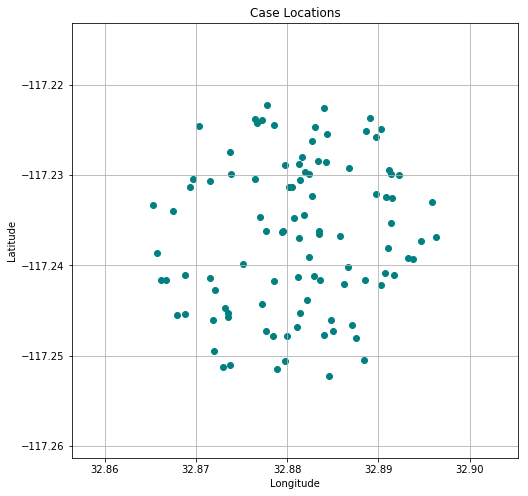

In [100]:
case_locations = [record.case.incident_location for record in records]
latitudes = [l.latitude for l in case_locations]
longitudes = [l.longitude for l in case_locations]

fig, ax = plt.subplots(figsize=(8, 8))
ax.ticklabel_format(useOffset=False)
plt.scatter(latitudes, longitudes, color="teal")
plt.title("Case Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()